In [187]:
import pandas as pd
import numpy as np

In [188]:
df = pd.read_csv("Top 5 league defensive actions and poss.csv")

In [189]:
df.head()

,Rk,Squad,Comp,# Pl,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,...,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.2,Fld.1,Def.1
0,1.0,Alavés,es La Liga,31.0,35.0,16.3,9.26,8.03,6.37,1.94,...,1.03,0.54,1.20,1.20,0.57,0.17,0.09,0.14,0.14,0.09
1,2.0,Angers,fr Ligue 1,30.0,36.0,18.0,11.10,9.08,7.14,1.75,...,1.11,0.61,1.69,1.69,0.94,0.17,0.08,0.19,0.28,0.03
2,3.0,Arminia,de Bundesliga,26.0,33.0,18.2,11.00,9.15,7.48,1.61,...,0.79,0.52,1.09,1.09,0.82,0.06,0.03,0.09,0.09,0.00
3,4.0,Arsenal,eng Premier League,27.0,35.0,15.3,9.49,6.86,5.74,2.66,...,1.11,0.60,2.34,2.34,1.63,0.20,0.03,0.26,0.11,0.11
4,5.0,Aston Villa,eng Premier League,30.0,34.0,18.2,10.60,8.94,7.03,2.21,...,1.35,0.35,2.15,2.15,1.41,0.21,0.21,0.21,0.12,0.00


In [190]:
df.shape

(364, 70)

In [191]:
df.describe().columns # numeric variables

Index(['Rk', '# Pl', '90s', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
       'Tkl.1', 'Att', 'Tkl%', 'Past', 'Press', 'Succ', '%', 'Def 3rd.1',
       'Mid 3rd.1', 'Att 3rd.1', 'Blocks', 'Sh', 'ShSv', 'Pass', 'Int',
       'Tkl+Int', 'Clr', 'Err', 'Poss', '90s.1', 'Touches', 'Def Pen',
       'Def 3rd.2', 'Mid 3rd.2', 'Att 3rd.2', 'Att Pen', 'Live', 'Succ.1',
       'Att.1', 'Succ%', '#Pl', 'Megs', 'Carries', 'TotDist', 'PrgDist',
       'Prog', '1-Mar', 'CPA', 'Mis', 'Dis', 'Targ', 'Rec', 'Rec%', 'Prog.1',
       'SCA', 'SCA90', 'PassLive', 'PassDead', 'Drib', 'Sh.1', 'Fld', 'Def',
       'GCA', 'GCA90', 'PassLive.1', 'PassDead.1', 'Drib.1', 'Sh.2', 'Fld.1',
       'Def.1'],
      dtype='object')

In [192]:
df = df[['Squad', 'Rk', '# Pl', '90s', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
       'Tkl.1', 'Att', 'Tkl%', 'Past', 'Press', 'Succ', '%', 'Def 3rd.1',
       'Mid 3rd.1', 'Att 3rd.1', 'Blocks', 'Sh', 'ShSv', 'Pass', 'Int',
       'Tkl+Int', 'Clr', 'Err', 'Poss', '90s.1', 'Touches', 'Def Pen',
       'Def 3rd.2', 'Mid 3rd.2', 'Att 3rd.2', 'Att Pen', 'Live', 'Succ.1',
       'Att.1', 'Succ%', '#Pl', 'Megs', 'Carries', 'TotDist', 'PrgDist',
       'Prog', '1-Mar', 'CPA', 'Mis', 'Dis', 'Targ', 'Rec', 'Rec%', 'Prog.1']]

In [193]:
df.head()

,Squad,Rk,# Pl,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,...,PrgDist,Prog,1-Mar,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1
0,Alavés,1.0,31.0,35.0,16.3,9.26,8.03,6.37,1.94,6.40,...,593.9,23.1,6.74,2.51,12.1,8.71,328.6,258.1,78.5,21.7
1,Angers,2.0,30.0,36.0,18.0,11.10,9.08,7.14,1.75,6.56,...,1050.8,38.5,10.90,3.22,14.3,15.30,462.4,409.0,88.4,28.6
2,Arminia,3.0,26.0,33.0,18.2,11.00,9.15,7.48,1.61,5.79,...,736.8,26.0,6.97,3.21,14.0,13.20,347.7,279.2,80.3,24.8
3,Arsenal,4.0,27.0,35.0,15.3,9.49,6.86,5.74,2.66,4.91,...,1218.7,48.5,14.10,5.26,12.6,10.40,486.6,424.6,87.3,30.9
4,Aston Villa,5.0,30.0,34.0,18.2,10.60,8.94,7.03,2.21,6.68,...,916.4,35.8,10.30,4.38,12.6,12.00,390.0,326.5,83.7,29.9


In [194]:
pd.set_option('display.max_rows', 70)
df.isnull().sum()

Squad        266
Rk           266
# Pl         266
90s          266
Tkl          266
TklW         266
Def 3rd      266
Mid 3rd      266
Att 3rd      266
Tkl.1        266
Att          266
Tkl%         266
Past         266
Press        266
Succ         266
%            266
Def 3rd.1    266
Mid 3rd.1    266
Att 3rd.1    266
Blocks       266
Sh           266
ShSv         266
Pass         266
Int          266
Tkl+Int      266
Clr          266
Err          266
Poss         266
90s.1        266
Touches      266
Def Pen      266
Def 3rd.2    266
Mid 3rd.2    266
Att 3rd.2    266
Att Pen      266
Live         266
Succ.1       266
Att.1        266
Succ%        266
#Pl          266
Megs         266
Carries      266
TotDist      266
PrgDist      266
Prog         266
1-Mar        266
CPA          266
Mis          266
Dis          266
Targ         266
Rec          266
Rec%         266
Prog.1       266
dtype: int64

In [195]:
df = df.fillna(df.mean())


/var/folders/st/4y9f4v3j053640l45_zcykd40000gn/T/ipykernel_18884/513357919.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [196]:
df.isnull().sum()


Squad        266
Rk             0
# Pl           0
90s            0
Tkl            0
TklW           0
Def 3rd        0
Mid 3rd        0
Att 3rd        0
Tkl.1          0
Att            0
Tkl%           0
Past           0
Press          0
Succ           0
%              0
Def 3rd.1      0
Mid 3rd.1      0
Att 3rd.1      0
Blocks         0
Sh             0
ShSv           0
Pass           0
Int            0
Tkl+Int        0
Clr            0
Err            0
Poss           0
90s.1          0
Touches        0
Def Pen        0
Def 3rd.2      0
Mid 3rd.2      0
Att 3rd.2      0
Att Pen        0
Live           0
Succ.1         0
Att.1          0
Succ%          0
#Pl            0
Megs           0
Carries        0
TotDist        0
PrgDist        0
Prog           0
1-Mar          0
CPA            0
Mis            0
Dis            0
Targ           0
Rec            0
Rec%           0
Prog.1         0
dtype: int64

In [197]:
names = df.Squad.tolist() # saving names for later

df = df.drop(['Squad'], axis = 1) # drop the short_name column 

In [198]:
df.head()

,Rk,# Pl,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,...,PrgDist,Prog,1-Mar,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1
0,1.0,31.0,35.0,16.3,9.26,8.03,6.37,1.94,6.40,16.3,...,593.9,23.1,6.74,2.51,12.1,8.71,328.6,258.1,78.5,21.7
1,2.0,30.0,36.0,18.0,11.10,9.08,7.14,1.75,6.56,17.2,...,1050.8,38.5,10.90,3.22,14.3,15.30,462.4,409.0,88.4,28.6
2,3.0,26.0,33.0,18.2,11.00,9.15,7.48,1.61,5.79,14.6,...,736.8,26.0,6.97,3.21,14.0,13.20,347.7,279.2,80.3,24.8
3,4.0,27.0,35.0,15.3,9.49,6.86,5.74,2.66,4.91,11.2,...,1218.7,48.5,14.10,5.26,12.6,10.40,486.6,424.6,87.3,30.9
4,5.0,30.0,34.0,18.2,10.60,8.94,7.03,2.21,6.68,15.4,...,916.4,35.8,10.30,4.38,12.6,12.00,390.0,326.5,83.7,29.9


In [199]:
from sklearn import preprocessing

x = df.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [200]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [201]:
from sklearn.cluster import KMeans

# specify the number of clusters
kmeans = KMeans(n_clusters=5)

# fit the input data
kmeans = kmeans.fit(reduced)

# get the cluster labels
labels = kmeans.predict(reduced)

# centroid values
centroid = kmeans.cluster_centers_

# cluster values
clusters = kmeans.labels_.tolist()

In [202]:
reduced['cluster'] = clusters
reduced['Squad'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head(10)

,x,y,cluster,name
0,-1.365493,-0.682491,2,Alavés
1,0.153117,0.353265,0,Angers
2,-1.157189,0.565708,4,Arminia
3,0.772243,-0.767533,3,Arsenal
4,-0.511954,-0.148994,2,Aston Villa
5,0.851291,0.356926,1,Atalanta
6,-0.074002,-0.604301,0,Athletic Club
7,0.428194,-0.250418,0,Atlético Madrid
8,-1.327731,0.405500,4,Augsburg
9,1.900511,0.246461,3,Barcelona


In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

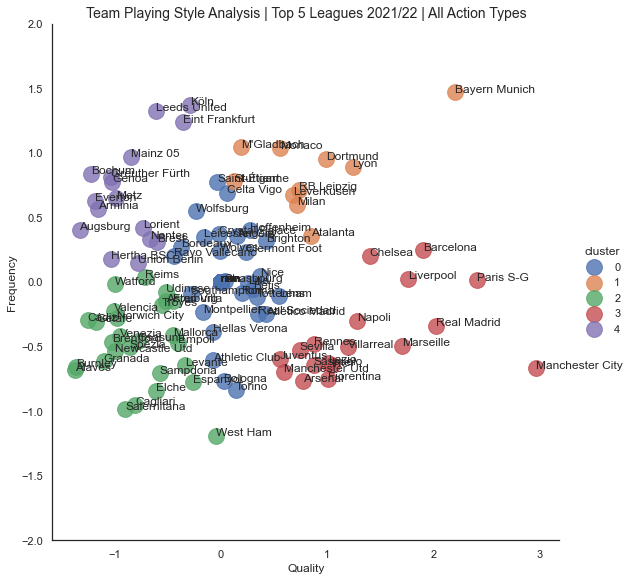

In [205]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=True, legend_out=True,
                   fit_reg=False, size = 8, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.title('Team Playing Style Analysis | Top 5 Leagues 2021/22 | All Action Types', fontsize = 14)
plt.xlabel("Quality", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)

plt.show()